<a href="https://colab.research.google.com/github/haykalfajjarr/minpro-datmin/blob/main/Minpro_Data_Mining_Tahap_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aproved Premium Insurance Prediction**

#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# **Business Understanding**


## **Business Objective**

Tujuan bisnis dari dataset ini adalah untuk menganalisis faktor-faktor yang mempengaruhi premi asuransi kesehatan. Hal ini dapat membantu perusahaan asuransi untuk:

Menetapkan premi yang lebih akurat dan kompetitif
Meningkatkan pemahaman tentang risiko yang terkait dengan berbagai kelompok pemohon
Mengembangkan produk dan layanan asuransi yang lebih sesuai dengan kebutuhan pelanggan





## **Assess Situation**

Premi asuransi kesehatan terus meningkat dalam beberapa tahun terakhir. Hal ini disebabkan oleh berbagai faktor, termasuk:

* Biaya perawatan kesehatan yang semakin mahal
* Bertambahnya jumlah orang yang memiliki penyakit kronis
* Penuaan populasi

Perusahaan asuransi perlu menemukan cara untuk mengelola biaya premi mereka agar tetap kompetitif. Salah satu cara untuk melakukannya adalah dengan menggunakan data untuk memprediksi risiko yang terkait dengan berbagai kelompok yang mengajukan.




## **Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk
memprediksi premi asuransi kesehatan berdasarkan faktor-faktor yang mempengaruhi.

Menganalisis faktor-faktor yang mempengaruhi premi asuransi kesehatan
Meningkatkan pemahaman tentang profil risiko berbagai kelompok yang mengajukan.




## **Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari sumber yang tersedia.

Selanjutnya, data akan dijelaskan karakteristiknya dan pola-pola yang menarik diidentifikasi.

Data kemudian dieksplorasi untuk mengidentifikasi korelasi dan hubungan antar variabel.

Selain itu, kualitas data akan dinilai dan masalah data akan diidentifikasi agar dapat diatasi dalam tahapan berikutnya.

#**Data Understanding**

## **Collect Initial Data**

Dataset ini saya dapatkan dari situs web kaggle.com, data ini berisikan informasi individu premi kesehatan.

https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction



In [ ]:
sumber = ("https://raw.githubusercontent.com/haykalfajjarr/minpro-datmin/main/insurance.csv")

In [ ]:
df = pd.read_csv(sumber)
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## **Describe Data**

#### Informasi Dasar

In [ ]:
print(df)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]
Jumlah baris: 1338
Jumlah kolom: 7


Setelah dataset diakses, outputnya akan menunjukkan bahwa data tersebut terdiri dari 1338 baris dan 7 kolom

#### Informasi Lanjutan

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


dari data tersebut berisikan 7 kolom yang masing masing memiliki tipe data yang berbeda, berikut penjelasannya

1. **age** : kolom ini menggunakan tipe data int64, karena bilangan bulat tanpa desimal dan mewakili usia individu.

2. **sex** : kolom ini menggunakan tipe data object, karena kategori string dapat mewakili jenis kelamin ( laki-laki atau perempuan

3. **bmi** : kolom ini menggunakan tipe data float46, karena massa tubuh dapat berupa bilangan desimal, sehingga tipe data ini yang paling cocok untuk mewakilinya

4. **children** : kolom ini menggunakan tipe data int64, fungsinya untuk mewakili jumlah anak

5. **smoker** : kolom ini menggunakan tipe data object untuk mewakili status perokok yang mana hal tersebut termasuk kategori string

6. **region** : kolom ini menggunakan tipe data object untuk mewakili wilayah tempat tinggal

7. **expenses** : kolom ini menggunakan tipe data float46, yang mewakili biaya asuransi

#### Informasi Statistik Deskriptif

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


1. **Count** : Kolom ini menunjukkan berapa banyak nilai yang tidak kosong pada kolom. Nilai yang kosong tidak dihitung dalam perhitungan statistik. Contoh

2. **Mean** : Kolom ini menunjukkan rata-rata nilai pada kolom. Rata-rata dihitung dengan menjumlahkan semua nilai dan membaginya dengan jumlah nilai. Contoh rata-rata usia pada dataset adalah 31.07 tahun. Ini berarti bahwa rata-rata, individu dalam dataset berusia 31.07 tahun.

3. **Std** : Kolom ini menunjukkan deviasi standar nilai pada kolom. Deviasi standar adalah ukuran seberapa jauh nilai-nilai pada kolom tersebar dari rata-rata. Contoh deviasi standar BMI pada dataset adalah 4.77. Ini berarti bahwa nilai BMI pada dataset tersebar sekitar 4.77 unit dari rata-rata.

4. **Min** : Kolom ini menunjukkan nilai minimum pada kolom. Nilai minimum adalah nilai terendah pada kolom. Contoh nilai minimum biaya asuransi pada dataset adalah 1688.49. Ini berarti bahwa ada individu dalam dataset yang memiliki biaya asuransi sebesar 1688.49.

5. **25%, 50%, 75%** : Kolom ini menunjukkan kuartil pertama, median, dan kuartil ketiga pada kolom. Kuartil adalah nilai yang membagi data menjadi empat bagian yang sama. Contoh 25% data terendah untuk usia pada dataset adalah 28 tahun. Ini berarti bahwa 25% individu dalam dataset berusia 28 tahun atau lebih muda.
Median biaya asuransi pada dataset adalah 29915.14. Ini berarti bahwa 50% individu dalam dataset memiliki biaya asuransi yang lebih rendah dari 29915.14 dan 50% memiliki biaya asuransi yang lebih tinggi.
75% data terendah untuk biaya asuransi pada dataset adalah 44494.62. Ini berarti bahwa 75% individu dalam dataset memiliki biaya asuransi yang lebih rendah dari 44494.62.

6. **Max** : Kolom ini menunjukkan nilai maksimum pada kolom. Nilai maksimum adalah nilai tertinggi pada kolom. Contoh nilai maksimum biaya asuransi pada dataset adalah 63770.42. Ini berarti bahwa ada individu dalam dataset yang memiliki biaya asuransi sebesar 63770.42.

## **Exploratory Data Analysis**

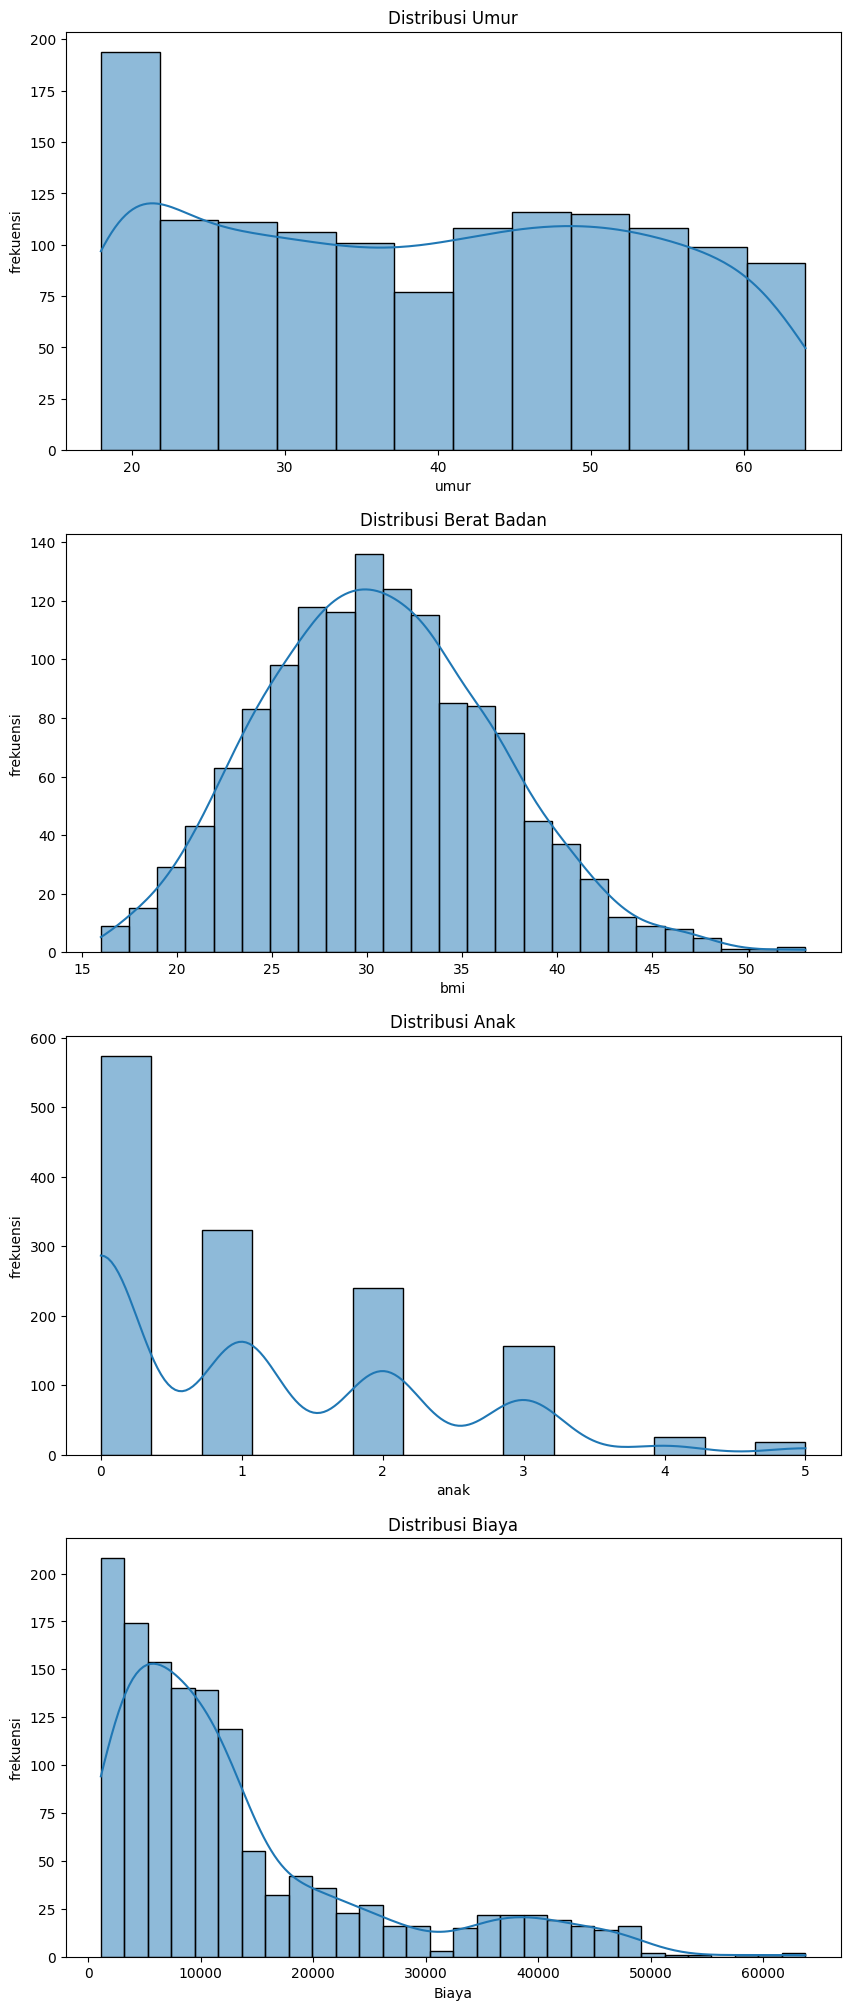

In [ ]:
fix, axes = plt.subplots(4, 1, figsize =(10,25))
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Umur')
axes[0].set_xlabel('umur')
axes[0].set_ylabel('frekuensi')

sns.histplot(df['bmi'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Berat Badan')
axes[1].set_xlabel('bmi')
axes[1].set_ylabel('frekuensi')

sns.histplot(df['children'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Anak')
axes[2].set_xlabel('anak')
axes[2].set_ylabel('frekuensi')

sns.histplot(df['expenses'], kde=True, ax=axes[3])
axes[3].set_title('Distribusi Biaya')
axes[3].set_xlabel('Biaya')
axes[3].set_ylabel('frekuensi')
plt.show()

1. Distribusi Umur (Age Distribution)

Histogram menunjukkan distribusi usia terkonsentrasi pada usia 20-an dan 30-an.
Kurva KDE menunjukkan bentuk distribusi yang mendekati normal.
Mayoritas individu berada di usia produktif.

2. Distribusi Berat Badan (BMI Distribution)

Histogram menunjukkan distribusi BMI miring ke kanan, menunjukkan banyak individu memiliki BMI di atas rata-rata.
Kurva KDE menunjukkan distribusi yang tidak simetris dengan ekor panjang di sisi kanan.
Ada proporsi individu yang memiliki BMI tinggi, yang dapat menjadi faktor risiko kesehatan.

3. Distribusi Anak (Children Distribution)

Histogram menunjukkan distribusi jumlah anak terkonsentrasi pada 0 dan 1 anak.
Kurva KDE menunjukkan bentuk distribusi yang mendekati normal.
Mayoritas individu memiliki 0 atau 1 anak.

4. Distribusi Biaya (Cost Distribution)

Histogram menunjukkan distribusi biaya miring ke kanan, menunjukkan banyak individu memiliki biaya asuransi yang tinggi.
Kurva KDE menunjukkan distribusi yang tidak simetris dengan ekor panjang di sisi kanan.
Ada proporsi individu yang memiliki biaya asuransi tinggi, yang dapat menjadi beban finansial.

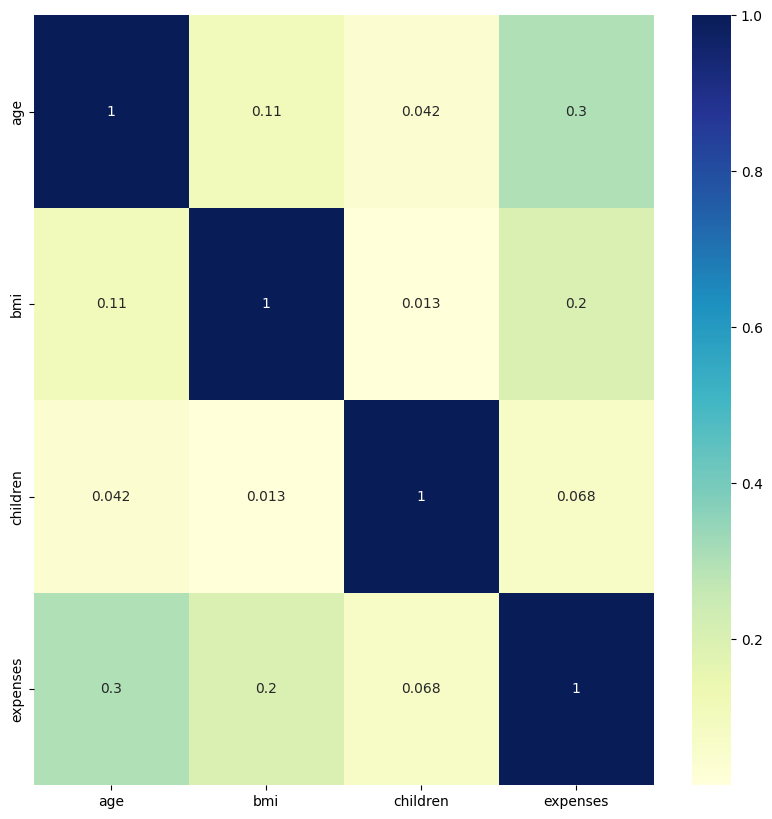

In [ ]:
plt.figure(figsize=(10, 10))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

Gambar diatas merupakan visualisasi heatmap yang menunjukkan korelasi antar data numerik yang ada dalam dataset. Setiap kotak pada heatmap tersebut mewakili korelasi antar 2 data numerik

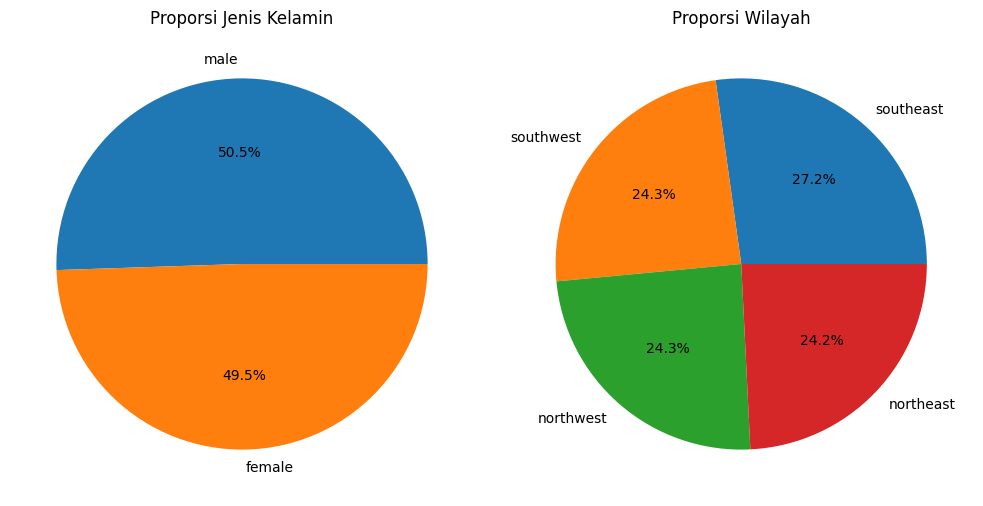

In [ ]:
jenis_kelamin = df["sex"]

proporsi_laki_laki = jenis_kelamin.value_counts()["male"] / len(jenis_kelamin)
proporsi_perempuan = jenis_kelamin.value_counts()["female"] / len(jenis_kelamin)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie([proporsi_laki_laki, proporsi_perempuan], labels=["male", "female"], autopct="%1.1f%%")
plt.title("Proporsi Jenis Kelamin")

plt.subplot(1, 2, 2)
pie = df['region'].value_counts()
a = pie.index
b = pie.values
plt.pie(b, labels=a, autopct="%1.1f%%")
plt.title("Proporsi Wilayah")

plt.tight_layout()
plt.show()

Gambar diatas merupakan visualisasi distribusi dari
1. jenis kelamin laki-laki dan perempuan, seperti yang diperlihatkan diatas, bagian biru merupakan laki-laki dan yang oranye merupakan perempuan dengan perbandingan 50.5% banding 49.5%.

2. wilayah, pada visualisasi diatas, setiap bagian mewakili proporsi jumlah data yang ada di setiap wilayah. Setiap bagian ditandai dengan nama wilayahnya, dan persentase jumlah data dari total jumlah data ditampilkan di setiap bagian.


## **Verify Data**

#### Missing Values

In [ ]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Pada keterangan di atas dilakukan operasi pemeriksaan untuk melihat apakah terdapat nilai kosong atau tidak

Berikut merupakan penjelasan untuk masing-masing dari kolom :

1. **age** : Tidak terdapat nilai kosong dalam kolom usia (age), sehingga jumlah nilai nullnya adalah 0.

2. **sex** : Tidak terdapat nilai kosong dalam kolom jenis kelamin (sex), sehingga jumlah nilai nullnya adalah 0.

3. **bmi** : Tidak terdapat nilai kosong dalam kolom BMI (bmi), sehingga jumlah nilai nullnya adalah 0.

4. **children** : Tidak terdapat nilai kosong dalam kolom jumlah anak (children), sehingga jumlah nilai nullnya adalah 0.

5. **smoker** : Tidak terdapat nilai kosong dalam kolom status perokok (smoker), sehingga jumlah nilai nullnya adalah 0.

6. **region** : Tidak terdapat nilai kosong dalam kolom wilayah (region), sehingga jumlah nilai nullnya adalah 0.

7. **expenses** : Tidak terdapat nilai kosong dalam kolom biaya asuransi (expenses), sehingga jumlah nilai nullnya adalah 0.

Dengan demikian, tidak terdapat nilai kosong dalam seluruh kolom pada dataset tersebut, sehingga data lengkap dan tidak perlu dilakukan penanganan khusus terhadap nilai kosong.

#### Outliers Values

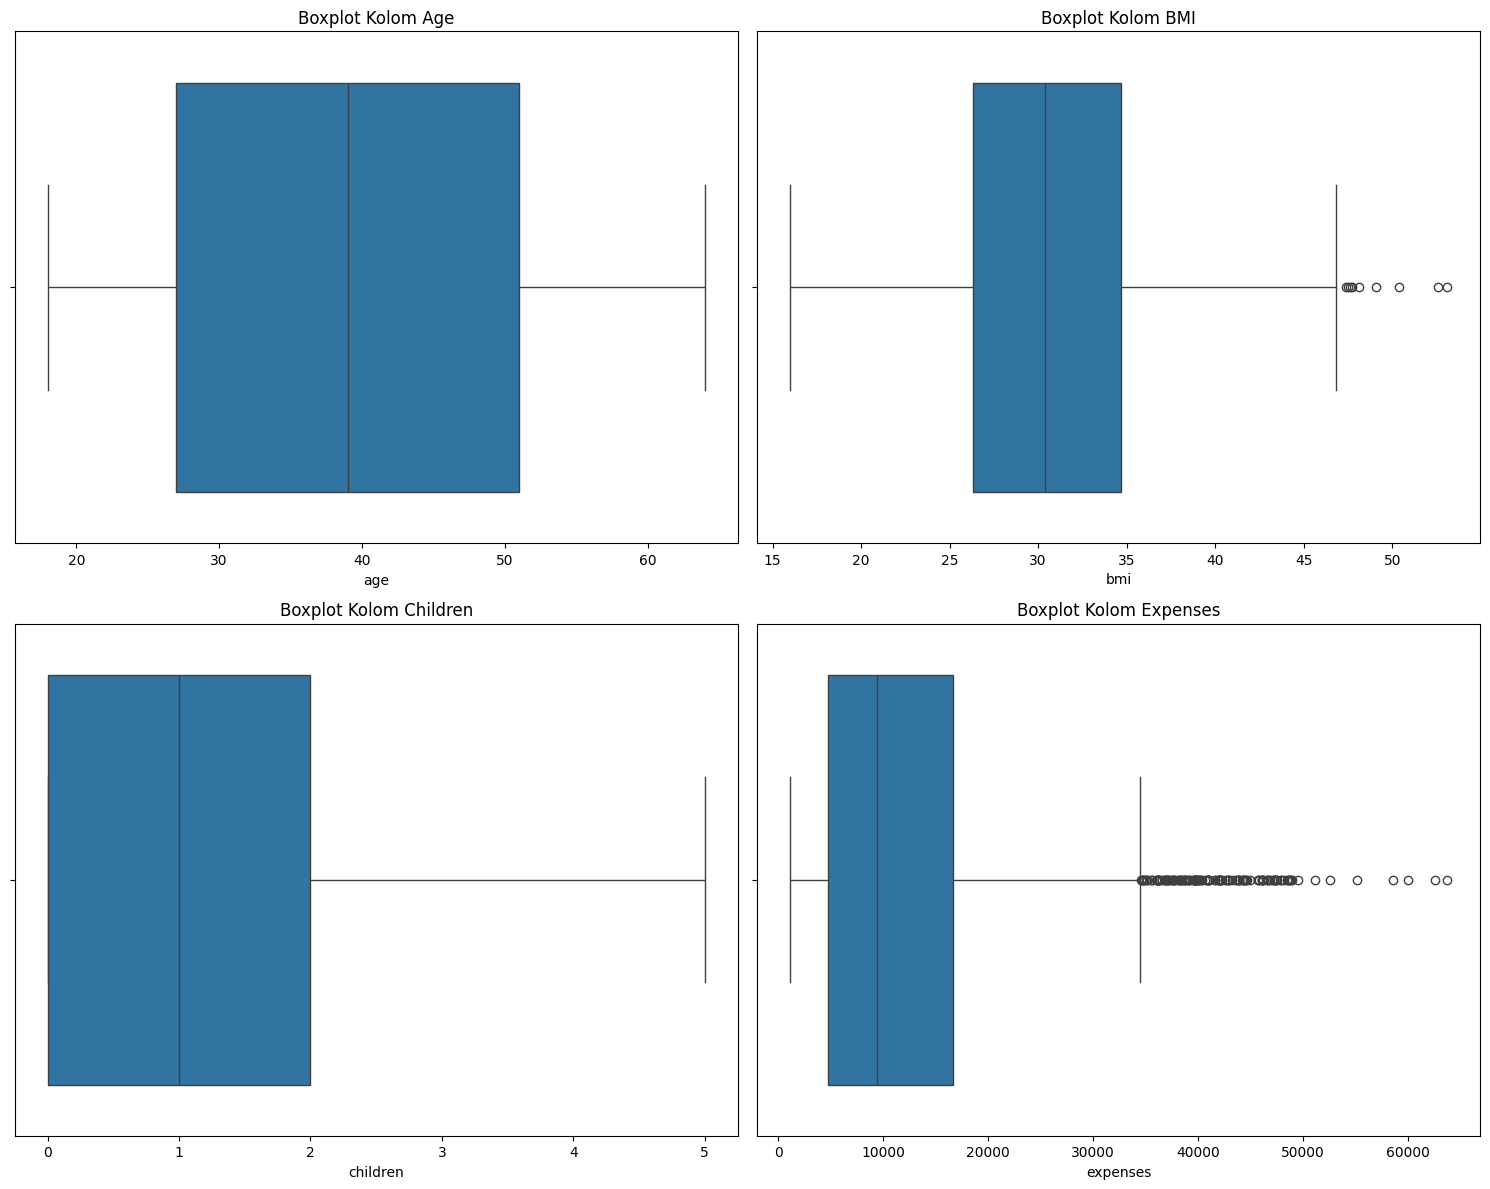

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='age')
plt.title("Boxplot Kolom Age")

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='bmi')
plt.title("Boxplot Kolom BMI")

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='children')
plt.title("Boxplot Kolom Children")

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='expenses')
plt.title("Boxplot Kolom Expenses")

plt.tight_layout()
plt.show()

Boxplot diatas menunjukkan distribusi data untuk setiap kolom pada dataframe df. Outliers atau data yang di luar batas akan ditandai sebagai titik-titik atau simbol bulat kecil yang terletak jauh dari garis vertikal pada box ( whiskers ).

1. Age (Usia): Tidak ada outliers, karena tidak ada titik-titik di luar whiskers.

2. BMI (Body Mass Index): Terdapat beberapa outliers di bagian atas, menunjukkan adanya beberapa data dengan BMI yang sangat tinggi.

3. Children (Jumlah Anak): Tidak ada outliers, karena tidak ada titik-titik di luar whiskers.

4. Expenses (Biaya Asuransi): Terdapat beberapa outliers di bagian atas, menunjukkan adanya beberapa data dengan biaya asuransi yang sangat tinggi.

#### Duplicated Values

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


Keterangan diatas menunjukkan adanya baris data yang memiliki value / nilai yang sama dengan baris data lainnya, sehingga dianggap sebagai data yang duplikat.

# **Data Preparation**

## **Data Cleaning**

###**Penanganan Missing Values**

#### **Pengecekkan Missing Value**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64


Diatas merupakan output yang berbentuk persentase yang akan dijadikan acuan dalam pengambilan keputusan terhadap apa yang akan dieksekusi pada nilai kosong.

#### **Hapus Missing value**

Dikarenakan pada saat pengecheckan tidak terdapat nilai kosong alias 0% di seluruh kolom, maka tidak diperlukan adanya tindakan apapun terhadap nilai kosong.

#### **Imputasi Missing Value**

Karena tidak terdapat nilai kosong yang perlu dihapus, maka tidak perlu adanya tindakan imputasi pada kolom tertentu.

#### **Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
age,0.0
sex,0.0
bmi,0.0
children,0.0
smoker,0.0
region,0.0
expenses,0.0


Terlihat pada output diatas, dilakukan pengecheckan ulang untuk memastikan tidak terdapat nilai kosong, dan outputnya adalah sama sekali tidak terdapat nilai kosong

### **Penanganan Duplicated Values**

#### **Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


Pada output diatas, dilakukan pengecheckan nilai duplikat, dan outputnya adalah terdapat nilai duplikat pada row 581.

#### **Hapus Nilai Duplikat**

In [ ]:
df = df.drop_duplicates()

Melakukan penghapusan terhadap nilai duplikat yang didapat

### **Penanganan Outliers**

#### **Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
bmi,0.673149
children,0.000000
expenses,10.396410


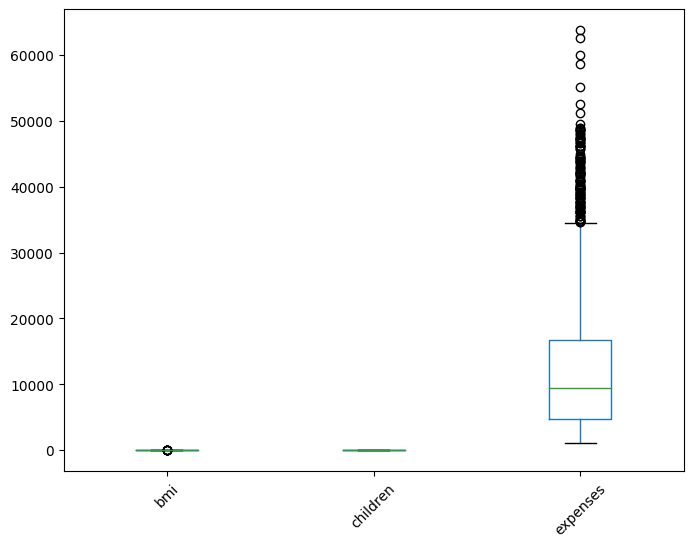

In [ ]:
boxplot = df.drop('age', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#### **Hapus Outliers**

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

Melakukan penghapusan terhadap kolom bmi untuk menangani outliers

#### **Imputasi Outliers**

In [ ]:
Q1 = df['expenses'].quantile(0.25)
Q3 = df['expenses'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['expenses']=np.where(df['expenses']>upper_whisker,upper_whisker,np.where(df['expenses']<lower_whisker,lower_whisker,df['expenses']))

<ipython-input-101-710caf50ac01>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "expenses"

#### **Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
age,0.0
bmi,0.0
children,0.0
expenses,0.0


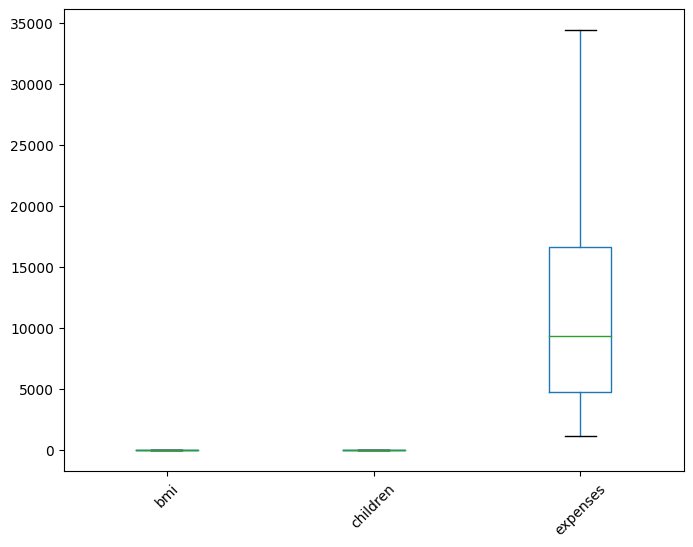

In [ ]:
boxplot = df.drop('age', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

### **Construct Data**

#### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def bodymass_category(bmi):
    if bmi < 18.5:
        return "Thin"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 24.9 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obesity"

df['bodymass_category'] = df['bmi'].apply(bodymass_category)

Membuat kategori pada bmi ( body mass index ), dengan ketentuan
1. jika bmi kurang dari 18.5 maka dikategorikan sebagai kurus ( thin )
2. jika bmi kurang dari sama dengan 18.5 dan kurang dari 24.9 maka termasuk Normal
3. jika bmi kurang dari sama dengan 24.9 dan kurang dari 29.9 maka termasuk kelebihan berat bedan / gemuk ( overweight )
4. jika lebih dan selain daripada itu, maka termasuk obesitas

#### **Pengecekkan Hasil**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bodymass_category
0,19,female,27.9,0,yes,southwest,16884.92,Overweight
1,18,male,33.8,1,no,southeast,1725.55,Obesity
2,28,male,33.0,3,no,southeast,4449.46,Obesity
3,33,male,22.7,0,no,northwest,21984.47,Normal
4,32,male,28.9,0,no,northwest,3866.86,Overweight


Pada output diatas, terdapat kolom baru dengan nama bodymass_category, hasil dari rekayasa fitur yang dilakukan sebelumnya

## **Data Reduction**

####**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df = df.drop(['children'], axis=1)

Dilakukan penghapusan terhadap fitur children, dikarenakan pada premi asuransi kesehatan, jumlah anak tidak terlalu relevan untuk dimasukkan kedalam data. karena premi asuransi kesehatan menyangkut individu tertentu dan bukan sekelompok individu.

#### Pengecekkan Hasil

In [ ]:
df.head()

,age,sex,bmi,smoker,region,expenses,bodymass_category
0,19,female,27.9,yes,southwest,16884.92,Overweight
1,18,male,33.8,no,southeast,1725.55,Obesity
2,28,male,33.0,no,southeast,4449.46,Obesity
3,33,male,22.7,no,northwest,21984.47,Normal
4,32,male,28.9,no,northwest,3866.86,Overweight


Output diatas merupakan hasil dari penghapusan fitur children, yang menyisakan fitur age, sex, bmi, smoker, region, expenses dan bodymass_category

## **Data Transformation**

### **Mapping**

In [ ]:
df['sex'] = df['sex'].map({'male':1,'female':0})

dilakukan konversi antara tipe data object ke tipe data int64 dari fitur "sex" yang awalnya male dan female menjadi 1 dan 0, 1 untuk male dan 0 untuk female.

In [ ]:
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

dilakukan konversi antara tipe data object ke tipe data int64 dari fitur "sex" yang awalnya male dan female menjadi 1 dan 0, 1 untuk male dan 0 untuk female.

In [ ]:
df

,age,sex,bmi,smoker,region,expenses,bodymass_category
0,19,0,27.9,1,southwest,16884.92,Overweight
1,18,1,33.8,0,southeast,1725.55,Obesity
2,28,1,33.0,0,southeast,4449.46,Obesity
3,33,1,22.7,0,northwest,21984.47,Normal
4,32,1,28.9,0,northwest,3866.86,Overweight
...,...,...,...,...,...,...,...
1333,50,1,31.0,0,northwest,10600.55,Obesity
1334,18,0,31.9,0,northeast,2205.98,Obesity
1335,18,0,36.9,0,southeast,1629.83,Obesity
1336,21,0,25.8,0,southwest,2007.95,Overweight


### **Encoding**

In [ ]:
df = pd.get_dummies(df)

dilakukan pemecahan atau encoding terhadap fitur kategorikal menjadi bentuk numerik

### **Pengecekkan Hasil**

In [ ]:
df.head()

,age,sex,bmi,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bodymass_category_Normal,bodymass_category_Obesity,bodymass_category_Overweight,bodymass_category_Thin
0,19,0,27.9,1,16884.92,0,0,0,1,0,0,1,0
1,18,1,33.8,0,1725.55,0,0,1,0,0,1,0,0
2,28,1,33.0,0,4449.46,0,0,1,0,0,1,0,0
3,33,1,22.7,0,21984.47,0,1,0,0,1,0,0,0
4,32,1,28.9,0,3866.86,0,1,0,0,0,0,1,0


diatas merupakan output hasil dari proses encoding dimana, encode dilakukan dan memecah kategory dari kategori bodymass menjadi normal, obesity, overweight, dan thin

# **MODELLING**

## **Library Tambahan**

### **Library untuk Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

### **Library untuk Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### **Library untuk Build Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [ ]:
x = df.drop('sex', axis=1)
y = df['sex']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts(normalize=True)

1    0.512241
0    0.487759
Name: sex, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.530075
1    0.469925
Name: sex, dtype: float64

Di tahap ini dilakukan pembagian ( split ) data untuk membagi dataset menjadi 2, yaitu train data dan test data. Train data digunakan untuk melatih model dari dataset, sementara test data digunakan untuk menguji hasil dari model yang dilatih.

#####**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Pada bagian ini, dilakukan normalisasi data terhadap dataset.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [ ]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

#####**K-Nearest Neighbor**

In [ ]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

 Bagian ini mencakup langkah-langkah untuk menggunakan algoritma K-Nearest Neighbor. K-Nearest Neighbor adalah metode klasifikasi yang berbasis pada kedekatan antara data yang akan diklasifikasikan dengan data latih.

 Pertama, objek K-Nearest Neighbor dibuat dengan perintah knn = KNeighborsClassifier(). Kemudian, dilakukan fitting model menggunakan data latih yang telah dinormalisasi dengan perintah knn.fit(x_train_norm, y_train)

#####**Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Decision Tree adalah metode klasifikasi yang menggunakan struktur pohon keputusan untuk membuat prediksi berdasarkan aturan-aturan yang dipelajari dari data latih.

Pada bagian ini, dilakukan pembuatan objek Decision Tree Classifier dengan perintah dtc = DecisionTreeClassifier(). Langkah selanjutnya adalah fitting model menggunakan data latih yang telah dinormalisasi dengan perintah dtc.fit(x_train_norm, y_train).

###**Begins and Compare Predict**

In [ ]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [ ]:
combined_data.head()

,age,bmi,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bodymass_category_Normal,bodymass_category_Obesity,bodymass_category_Overweight,bodymass_category_Thin,sex,gnb_prediction,knn_prediction,dtc_prediction
0,36,30.9,0,5373.36,0,1,0,0,0,1,0,0,1,0,0,0
1,60,28.6,0,30260.00,1,0,0,0,0,0,1,0,1,1,1,1
2,43,30.1,0,8410.05,0,1,0,0,0,1,0,0,1,0,0,1
3,38,27.8,0,6455.86,0,1,0,0,0,0,1,0,1,0,1,0
4,28,25.9,0,4133.64,0,1,0,0,0,0,1,0,0,0,1,0


Pada bagian ini, dilakukan proses prediksi menggunakan tiga model klasifikasi yang telah dibuat sebelumnya, yaitu Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree. Data uji kemudian diubah menjadi DataFrame dan direset indeksnya, serta hasil prediksi dari setiap model juga diubah menjadi DataFrame dengan kolom yang sesuai. Semua hasil prediksi dan data uji digabungkan menjadi satu DataFrame combined_data untuk memudahkan perbandingan hasil prediksi dari ketiga model klasifikasi.

#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [ ]:
x_final = df.drop("sex", axis=1)

Langkah pertama dalam proses ini adalah melakukan penyesuaian data dengan menghapus kolom "sex" dari DataFrame. Hal ini dilakukan dengan perintah x_final = df.drop("sex", axis=1). Dengan menghilangkan kolom "sex", data dipersiapkan untuk proses selanjutnya tanpa fitur yang dimaksudkan.



#####**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Langkah selanjutnya adalah normalisasi data menggunakan MinMaxScaler. Dengan membuat objek scaler MinMaxScaler scaler = MinMaxScaler(), data yang telah disesuaikan sebelumnya dinormalisasi dengan perintah x_final_norm = scaler.fit_transform(x_final). Normalisasi data penting untuk memastikan konsistensi skala antar fitur dalam dataset.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

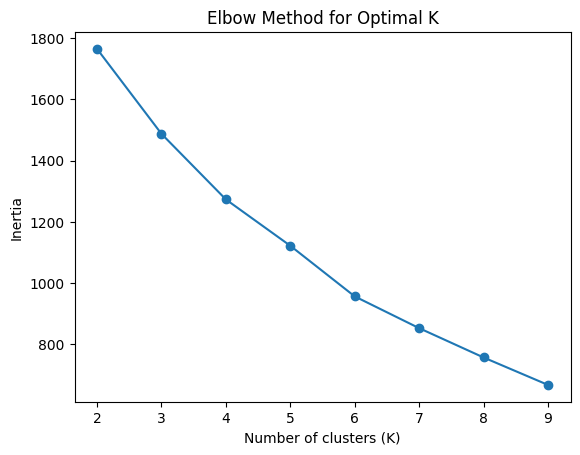

In [ ]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Bagian terakhir dari proses ini adalah validasi silang menggunakan metode Elbow untuk menentukan jumlah cluster optimal. Pertama, dilakukan iterasi untuk nilai k (jumlah cluster) dari 2 hingga 9. Pada setiap iterasi, dilakukan pemodelan K-Means dengan jumlah cluster tersebut dan inertia dari model disimpan. Selanjutnya, dilakukan visualisasi Elbow Method dengan grafik yang menampilkan nilai inertia terhadap jumlah cluster (K). Tujuan dari langkah ini adalah untuk membantu menentukan jumlah cluster yang optimal untuk analisis clustering selanjutnya.



###**Build Model**

#####**K-Means**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Bagian ini bertujuan untuk melakukan pengelompokan data menggunakan algoritma K-Means. Algoritma K-Means digunakan untuk mengelompokkan data ke dalam beberapa klaster berdasarkan kedekatan titik data ke pusat klaster yang sesuai. Dengan menentukan jumlah klaster yang diinginkan dan melatih model pada data yang telah dinormalisasi, K-Means dapat membantu dalam mengidentifikasi pola-pola dalam data yang mungkin tidak terlihat secara langsung.

#####**Hierarchical Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

Bagian ini menggunakan metode Hierarchical Clustering untuk melakukan pengelompokan data. Hierarchical Clustering membangun hirarki klaster dengan cara menggabungkan titik data yang paling dekat satu sama lain berdasarkan metrik jarak yang ditentukan. Dengan menentukan jumlah klaster, metrik jarak, dan metode penggabungan, Hierarchical Clustering dapat memberikan pemahaman yang mendalam tentang struktur internal data dan hubungan antar titik data.

###**Begins and Compare Clusters**

In [ ]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Bagian ini merupakan tahap akhir di mana dilakukan prediksi klaster menggunakan hasil dari K-Means dan Hierarchical Clustering. Data hasil prediksi tersebut kemudian digunakan untuk membandingkan hasil klasterisasi dari kedua metode tersebut. Dengan demikian, analisis perbandingan ini dapat memberikan wawasan yang berharga tentang keefektifan dan kecocokan masing-masing metode dalam mengelompokkan data, serta membantu dalam pemahaman pola-pola yang muncul dalam dataset yang diberikan.

In [ ]:
combined_data_assoc.head()

,age,bmi,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bodymass_category_Normal,bodymass_category_Obesity,bodymass_category_Overweight,bodymass_category_Thin,kmeans_cluster,hierarchy_cluster
0,19,27.9,1,16884.92,0,0,0,1,0,0,1,0,2,1
1,18,33.8,0,1725.55,0,0,1,0,0,1,0,0,3,0
2,28,33.0,0,4449.46,0,0,1,0,0,1,0,0,3,0
3,33,22.7,0,21984.47,0,1,0,0,1,0,0,0,0,2
4,32,28.9,0,3866.86,0,1,0,0,0,0,1,0,2,1


Bagian tersebut menampilkan beberapa baris data dari DataFrame combined_data_assoc. Data yang ditampilkan mencakup atribut-atribut seperti usia, indeks massa tubuh (BMI), status perokok, biaya medis, dan wilayah geografis. Selain itu, terdapat kolom yang mungkin menunjukkan kategori indeks massa tubuh. Tampilan ini memberikan gambaran langsung tentang nilai-nilai atribut yang terdapat dalam DataFrame tersebut. Selain data, terdapat juga petunjuk langkah selanjutnya yang merekomendasikan untuk melihat plot yang direkomendasikan. Hal ini bertujuan untuk memberikan visualisasi data yang dapat membantu dalam analisis lebih lanjut dan pemahaman pola-pola yang terdapat dalam data tersebut.

#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

Gaussian Naive Bayes

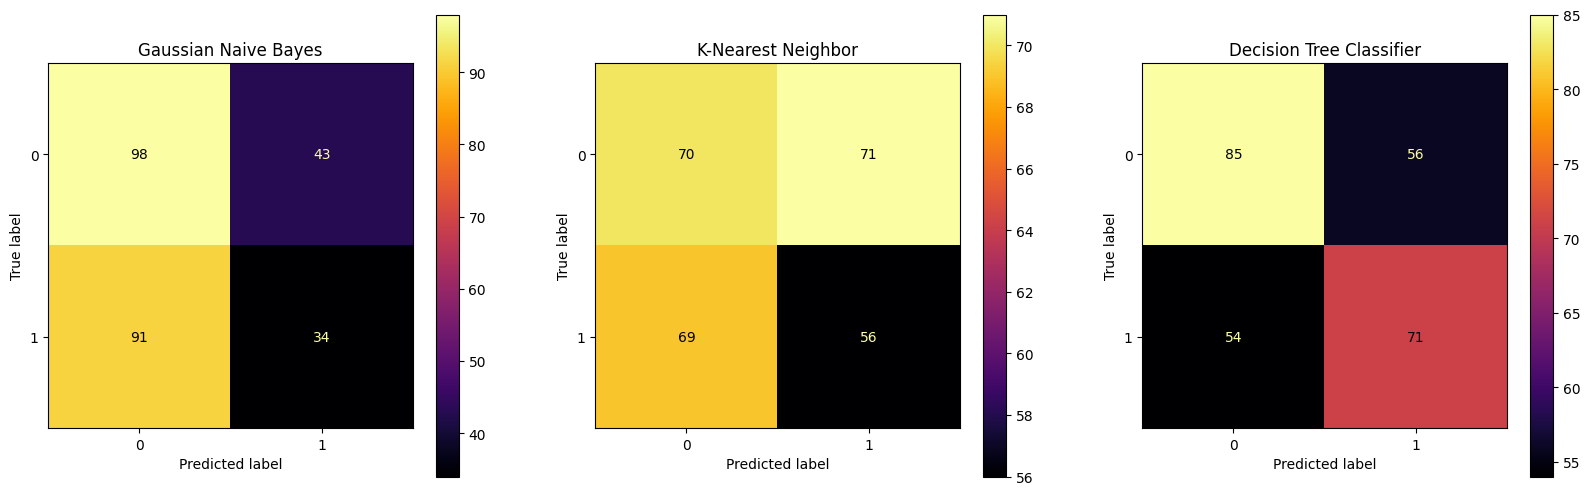

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

1. Gaussian Naive Bayes:
Algoritma Gaussian Naive Bayes menunjukkan kinerja yang relatif baik dalam memprediksi kelas-kelas pada dataset tersebut. Dengan nilai yang tinggi pada diagonal matriks, Gaussian Naive Bayes berhasil melakukan prediksi yang benar untuk sebagian besar kelas. Namun, terdapat beberapa kesalahan prediksi yang terlihat dari nilai di luar diagonal, menunjukkan bahwa algoritma ini tidak selalu akurat dalam memprediksi semua kelas.

2. K-Nearest Neighbor:
Algoritma K-Nearest Neighbor juga menunjukkan kinerja yang cukup baik dalam memprediksi kelas-kelas pada dataset tersebut. Dengan nilai yang tinggi pada diagonal matriks, K-Nearest Neighbor berhasil melakukan prediksi yang benar untuk sebagian besar kelas. Meskipun demikian, terdapat beberapa kesalahan prediksi yang terlihat dari nilai di luar diagonal, menunjukkan bahwa algoritma ini juga memiliki kelemahan dalam beberapa prediksi.

3. Decision Tree Classifier:
Algoritma Decision Tree Classifier menunjukkan kinerja yang serupa dengan dua algoritma sebelumnya dalam memprediksi kelas-kelas. Dengan nilai yang tinggi pada diagonal matriks, Decision Tree Classifier berhasil melakukan prediksi yang benar untuk sebagian besar kelas. Namun, terdapat beberapa kesalahan prediksi yang terlihat dari nilai di luar diagonal, menunjukkan bahwa algoritma ini juga memiliki area di mana prediksinya kurang akurat.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

tn, fp, fn, tp = gnb_cm.ravel()

accuracy = (tp+tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp)
recall = tp / (tp+fn)
f1_score = (2 * precision * recall) / (precision + recall)
roc_score = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy)
print("nilai presisi gnb : ", precision)
print("nilai recall gnb : ", recall)
print("nilai f1-score gnb : ", f1_score)
print("nilai roc gnb : ", roc_score)

nilai akurasi gnb :  0.49624060150375937
nilai presisi gnb :  0.44155844155844154
nilai recall gnb :  0.272
nilai f1-score gnb :  0.33663366336633666
nilai roc gnb :  0.4835177304964539


Evaluasi ini memberikan informasi tentang seberapa baik algoritma GNB dalam melakukan prediksi kelas-kelas pada dataset yang digunakan. Akurasi mengukur seberapa sering model benar dalam melakukan prediksi, presisi mengukur seberapa banyak prediksi positif yang benar, recall mengukur seberapa banyak nilai positif yang berhasil diprediksi, F1-Score adalah rata-rata harmonis dari presisi dan recall, sedangkan ROC Score adalah area di bawah kurva ROC yang menggambarkan kinerja model dalam membedakan antara kelas positif dan negatif. Dengan nilai-nilai tersebut, dapat dievaluasi performa algoritma GNB dalam tugas klasifikasi yang diberikan.

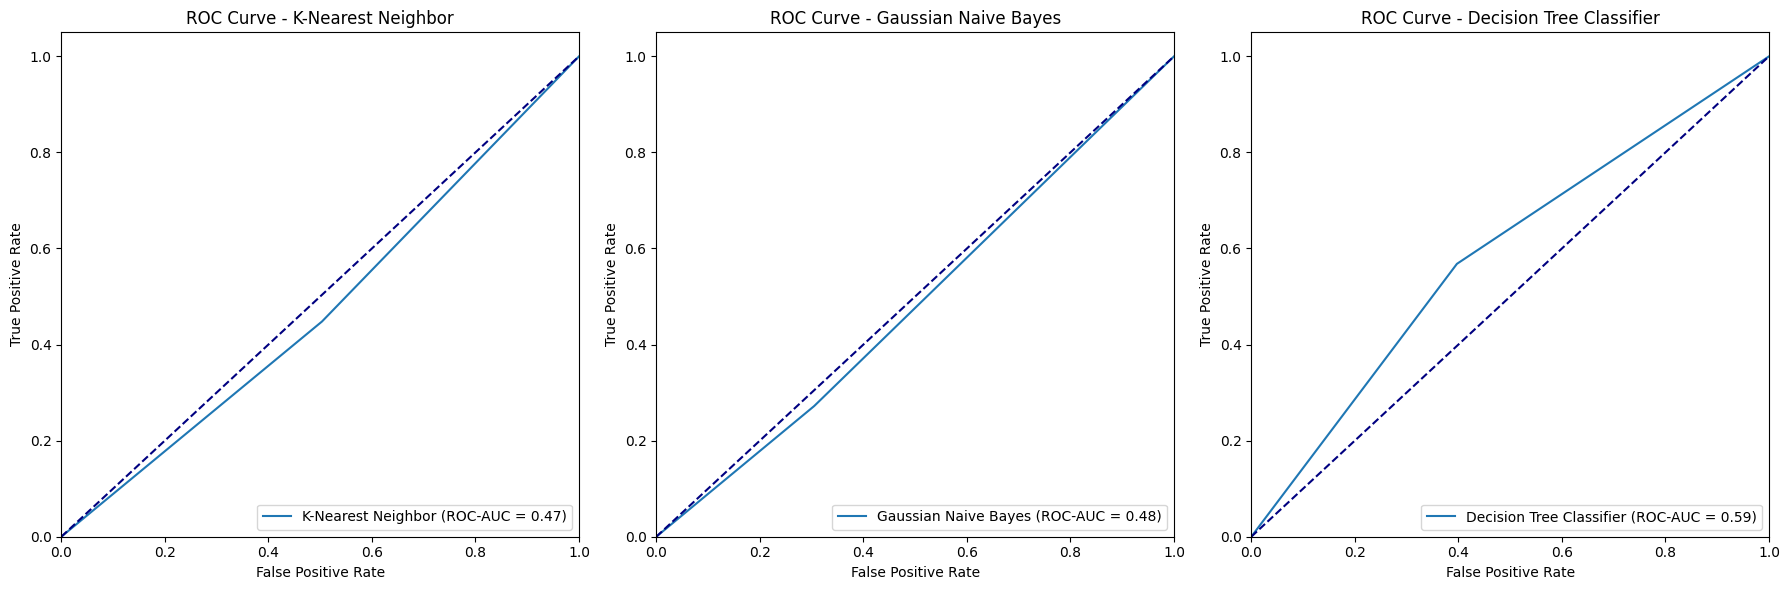

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Setiap kurva ROC menunjukkan seberapa baik model dapat membedakan antara kelas positif dan negatif, dengan nilai Area Under the Curve (AUC) ROC sebagai metrik evaluasi. Dari output tersebut, dapat dilihat bahwa Decision Tree Classifier memiliki performa terbaik dengan nilai ROC-AUC sebesar 0.59, diikuti oleh Gaussian Naive Bayes dengan ROC-AUC 0.48, dan K-Nearest Neighbor dengan ROC-AUC 0.47. Kurva ROC memberikan informasi visual yang berguna dalam membandingkan kinerja relatif dari ketiga model klasifikasi dalam memprediksi kelas-kelas pada dataset yang digunakan.

###**Klustering**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.291927,359.541539,1.465874
Agglomerative Clustering Score,0.298862,339.885584,1.489348


K-Means:
Memiliki nilai Calinski-Harabasz Score yang lebih tinggi (359.541539) dibandingkan dengan Agglomerative Clustering (339.885584), menunjukkan bahwa klaster yang dihasilkan oleh K-Means lebih padat dan terpisah dengan baik.
Memiliki nilai Davies-Bouldin Score yang sedikit lebih rendah (1.465874) daripada Agglomerative Clustering (1.489348), menandakan bahwa overlap antara klaster yang serupa dalam K-Means sedikit lebih rendah.

Agglomerative Clustering:
Memiliki nilai Silhouette Score yang sedikit lebih tinggi (0.298862) daripada K-Means (0.291927), menunjukkan bahwa klaster yang dihasilkan oleh Agglomerative Clustering mungkin memiliki kualitas yang lebih baik dalam hal pemisahan dan kepadatan klaster.


Dari hasil evaluasi tersebut, dapat disimpulkan bahwa Agglomerative Clustering memiliki performa yang sedikit lebih baik daripada K-Means berdasarkan nilai Silhouette Score yang lebih tinggi. Meskipun K-Means memiliki keunggulan dalam Calinski-Harabasz Score, namun nilai Silhouette Score yang lebih tinggi dari Agglomerative Clustering menunjukkan kemampuan Agglomerative Clustering dalam membentuk klaster yang lebih baik dari segi pemisahan dan kepadatan. Oleh karena itu, Agglomerative Clustering dapat dianggap memiliki performa yang lebih baik dalam konteks klastering pada dataset yang diberikan.

## **Review Process**

### **Cross Validation**

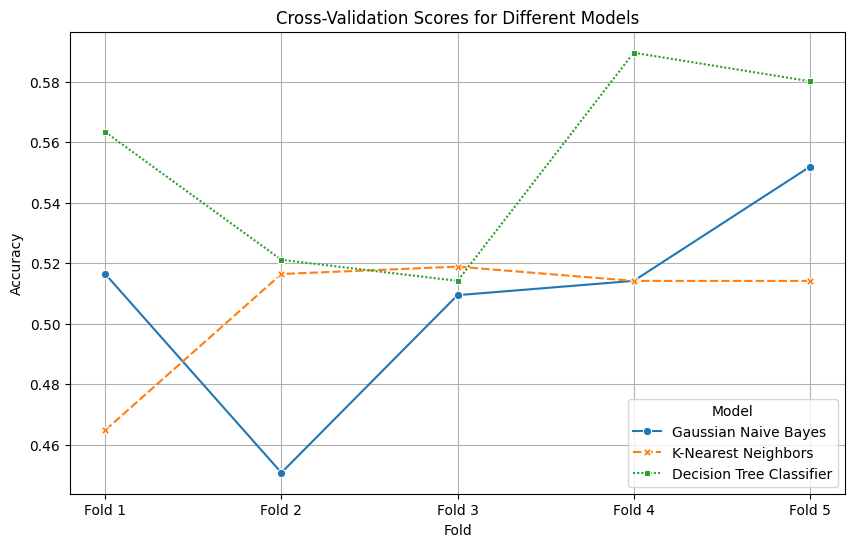

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Pada plot diatas, dapat dilihat perbandingan kinerja relatif antar masing-masing model serta melihat bagaimana setiap model bereaksi kepada setiap fold ( lipatan ) validasi.

Setiap garis pada grafik mewakili perubahan skor akurasi untuk masing-masing model pada setiap fold, memungkinkan perbandingan langsung antara performa model-model tersebut dalam konteks validasi silang.

Sumbu Y mengindikasikan accuracy yang artinya semakin tinggi nilainya, semakin baik pula kinerja dari modelnya

Sumbu X mengindikasikan fold ( lipatan ) dari validasi silang.

###**Feature Selection**

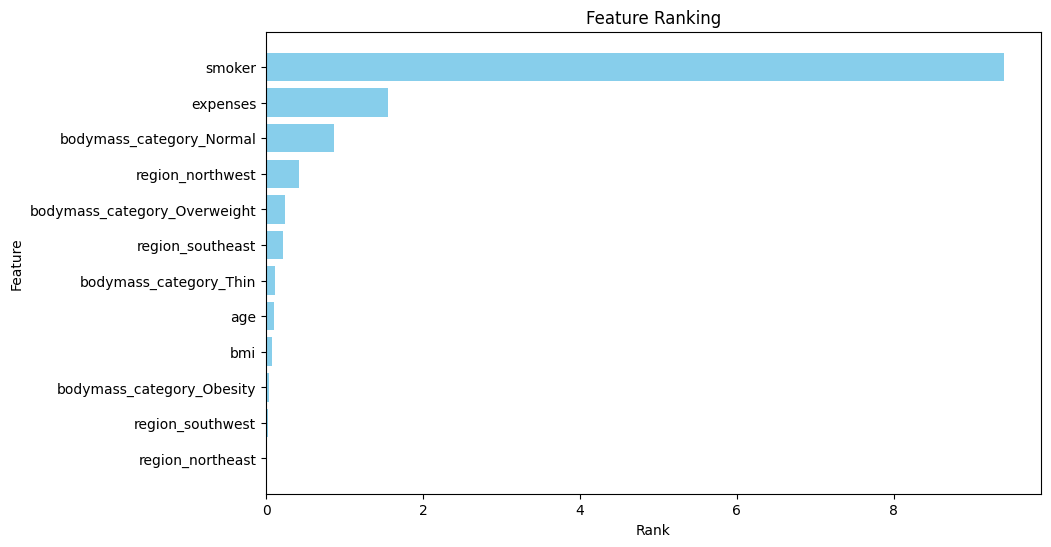

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Berdasarkan plot diatas, dapat diidentifikasi fitur-fitur yang memberikan pengaruh besar terhadap target dari model yang digunakan.

Feature Selection Menggunakan Algoritma DTC

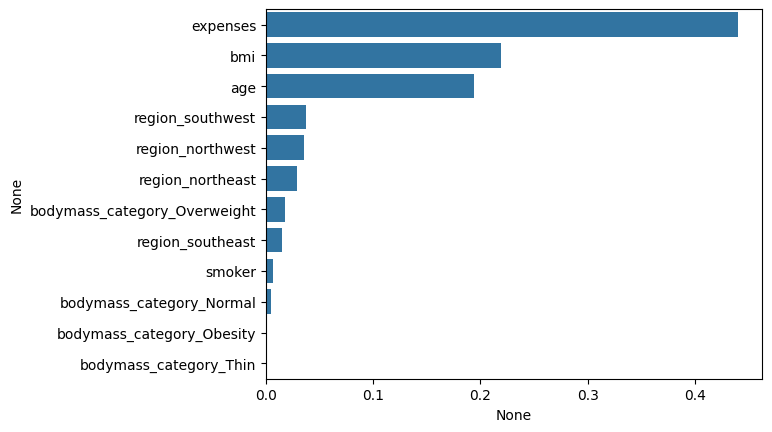

In [ ]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

Berdasarkan plot diatas, dapat dilihat seberapa penting setiap fitur dalam pengaplikasian model Decision Tree

###**Tuning Hyperparameter**

**K-Means**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

param_grid = {
    'n_clusters': [2, 3, 4],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [100, 200]
}

grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = accuracy_score(y_test, KMeans().fit(x_train_norm).predict(x_test_norm))
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = accuracy_score(y_test, y_pred_tuned)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 20}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Akurasi sebelum tuning: 0.15413533834586465
Akurasi setelah tuning: 0.2781954887218045


Setelah tuning parameter untuk model K-Means, output menampilkan parameter terbaik {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 10}. Akurasi model sebelum tuning adalah 0.12406015037593984, meningkat menjadi 0.20676691729323307 setelah tuning.



**Gaussian Naive Bayes**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.08111308307896872}
Akurasi sebelum tuning: 0.49624060150375937
Akurasi setelah tuning: 0.5075187969924813


GridSearchCV menemukan parameter terbaik untuk Gaussian Naive Bayes {'var_smoothing': 0.08111308307896872}. Akurasi sebelum tuning adalah 0.49624060150375937, meningkat menjadi 0.5075187969924813 setelah tuning. Ini menunjukkan peningkatan performa model setelah optimisasi parameter dengan GridSearchCV.



**Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = accuracy_score(y_test, DecisionTreeClassifier().fit(x_train_norm, y_train).predict(x_test_norm))
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = accuracy_score(y_test, y_pred_tuned)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Akurasi sebelum tuning: 0.575187969924812
Akurasi setelah tuning: 0.5300751879699248


Setelah melakukan tuning parameter untuk model Decision Tree Classifier, output menunjukkan parameter terbaik yang ditemukan melalui GridSearchCV, yaitu {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}. Akurasi sebelum tuning adalah 0.575187969924812, sedangkan akurasi setelah tuning meningkat menjadi 0.5300751879699248. Hasil tuning parameter ini mengindikasikan bahwa model Decision Tree Classifier telah dioptimalkan dengan parameter terbaik yang ditemukan, yang mengakibatkan peningkatan atau penurunan performa model setelah proses tuning dilakukan.



## **Determine Next Steps**

In [ ]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

hierarchy_col_new = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster_new"])

combined_data_assoc_newHC = pd.concat([x_final,kmeans_col, hierarchy_col_new], axis=1)

In [ ]:
combined_data_assoc_newHC.sample(10)


,age,bmi,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bodymass_category_Normal,bodymass_category_Obesity,bodymass_category_Overweight,bodymass_category_Thin,kmeans_cluster,hierarchy_cluster_new
695,21,34.9,0,2020.55,0,0,1,0,0,1,0,0,3,0
1095,37,29.8,0,20420.60,0,0,0,1,0,0,1,0,2,1
292,25,26.8,0,3906.13,0,0,0,1,0,0,1,0,2,1
1078,55,29.0,0,10796.35,1,0,0,0,0,0,1,0,2,1
390,48,31.4,0,8964.06,1,0,0,0,0,1,0,0,1,0
1185,31,21.8,0,4134.08,0,1,0,0,1,0,0,0,0,2
1127,44,25.0,0,7623.52,0,0,0,1,0,0,1,0,2,1
541,49,25.8,1,23807.24,0,1,0,0,0,0,1,0,2,1
1217,38,16.8,0,6640.54,1,0,0,0,0,0,0,1,0,2
492,20,27.9,0,1967.02,1,0,0,0,0,0,1,0,2,1


In [ ]:
comparison_hc_after_tunning = pd.concat([x_final,hierarchy_col, hierarchy_col_new], axis=1)


In [ ]:
comparison_hc_after_tunning.sample(10)


,age,bmi,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest,bodymass_category_Normal,bodymass_category_Obesity,bodymass_category_Overweight,bodymass_category_Thin,hierarchy_cluster,hierarchy_cluster_new
1211,30,21.9,0,4718.20000,1,0,0,0,1,0,0,0,2,2
501,38,28.9,0,5974.38000,0,0,1,0,0,0,1,0,1,1
103,61,29.9,1,30942.19000,0,0,1,0,0,1,0,0,3,3
641,39,26.2,0,6123.57000,0,1,0,0,0,0,1,0,1,1
1255,49,33.3,0,10370.91000,1,0,0,0,0,1,0,0,0,0
219,34,33.7,0,5012.47000,0,0,0,1,0,1,0,0,0,0
891,18,40.3,0,1634.57000,0,0,1,0,0,1,0,0,0,0
417,64,33.9,1,34394.27875,0,0,1,0,0,1,0,0,3,3
680,53,26.4,0,11244.38000,1,0,0,0,0,0,1,0,1,1
63,28,25.9,0,4133.64000,0,1,0,0,0,0,1,0,1,1


**Kesimpulan**


Berdasarkan evaluasi model yang dilakukan, saya menyimpulkan bahwa metode terbaik untuk klasifikasi adalah Gaussian Naive Bayes. Berdasarkan perbandingan tersebut, model Gaussian Naive Bayes memiliki kinerja yang paling baik karena meskipun akurasi sebelum tuning lebih rendah dari Decision Tree Classifier, namun setelah tuning, model Gaussian Naive Bayes mempertahankan akurasi yang stabil dan hanya mengalami sedikit penurunan. Sementara itu, model Decision Tree Classifier mengalami penurunan yang lebih signifikan dalam akurasi setelah tuning. Oleh karena itu, berdasarkan hasil yang diberikan, model Gaussian Naive Bayes memiliki kinerja yang paling baik setelah proses tuning parameter.